# Logistic Regression 
Optimization objective : 
\begin{align*}
\text{minimize}_{\theta \in \mathbb{R}^d} \quad {1 \over N} \sum_{i = 1}^N \log(1 + \exp(-Y_i X_i^\top \theta))
\end{align*}

Suppose that we are using a stochastic gradient descent algorithm. Then, the gradient of the loss function is obviously 
$$
-Y_i X_i {\exp(-Y_i X_i^\top\theta) \over {1 + \exp(-Y_i X_i^\top\theta)}}.
$$
Please make sure that you understand this. 

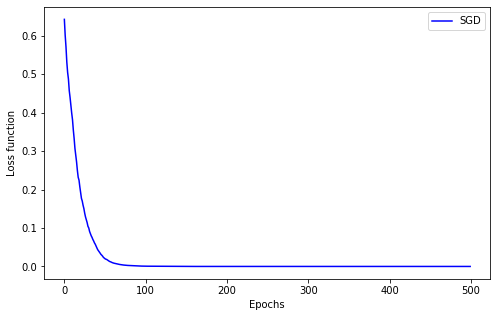

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp, log

#######################################
### STEP 1 : Sample data generation ###
#######################################
N, d = 30, 20
np.random.seed(0)
X = np.random.randn(N, d)
Y = 2 * np.random.randint(2, size = N) - 1


###################################
### STEP 2 : SGD implementation ###
###################################
theta = np.random.randn(d) * 1e-2
K = 500     # number of epochs
alpha = 0.0003
f_val = []

for iter_ in range(K * N) : 
    idx = np.random.randint(N)

    temp = np.exp(-Y[idx] * X[idx, :].T * theta)
    d_theta = (temp / (1 + temp)) * (-Y[idx] * X[idx, :])
    theta -= alpha * d_theta

    if iter_ % N == 0 : 
        f_val.append(np.log(1 + np.exp(-Y.T @ X @ theta)))    

plt.figure(figsize = (8, 5))
plt.plot(np.arange(K), f_val, color = "blue", label = "SGD")
plt.xlabel("Epochs")
plt.ylabel('Loss function')
plt.legend()
plt.show()